## Introduction

in this Hackathon, we'll be examining membership data. There are four different data files. This notebook will provide an initial starting framework to help you get started with the exercise but use it mainly as a starter than as a specific guided approach. The dataset is subsetted from https://www.kaggle.com/c/kkbox-churn-prediction-challenge/data. It has been trimmed down to make the dataset easier to analyze and process.

Participants are encouraged to both read the description from the original source regarding the schema labels as well as examine external reading material for understanding customer churn.

In [1]:
#loading the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading the requisite files

churn_df = pd.read_csv('trunc_churn.csv')
members_df = pd.read_csv('trunc_members.csv')
transact_df = pd.read_csv('trunc_transaction.csv')
users_df = pd.read_csv('trunc_users.csv')

First let's have a look at the various datasets supplied

In [3]:
print(churn_df.shape)
churn_df.sample(10)

(20000, 2)


,msno,is_churn
1788,M+EPyGTBDaUXzwWLgbuM/24ypbErDsJzK2wyZ/wRrbk=,0
5847,1kN3bu+kar0Wb4uuAYx/xkypbHzRAIZ26/3XTpBCTts=,0
17338,P7eN2dQR9ZAFzEyuHB/ysMIV7/tF8vSSvCaiRfy1ZN8=,0
12990,IpBNvoA4+7ySJ21PijRmb0MZraGB3VbAECpNWpznT/E=,0
11174,FOi8Mu8GJb4UqBz+WH165T6BMtoqyyA0OO9XUxxZYZY=,0
7380,D4lpR/HeSTRkNOrlAgRLUNo+fCm0DGQjFToFkMXxU70=,0
2777,QqBaaRx56lkAvEM1ZSvLmWqazv7EG3yKjmvzjHwpeMA=,0
3915,Kq9sJ4n+bb0F8FlABdq2ysHqsYvhUTMM/6uqrS2pCTM=,0
2475,QSA3LpYm22dkW2EHUDpDSbqVH0XdMlcEDuQpqdYb0Is=,0
3196,JDaBwKyIPqca4c1NlAUXDJwr6/UI/UKvN8XNuJ32Kes=,0


In [4]:
print(members_df.shape)
members_df.sample(10)

(17660, 6)


,msno,city,bd,gender,registered_via,registration_init_time
2177,0en+oh4oLj7fNxifri4zy84bOqtfsRwRF+zIRa+tX5M=,1,0,NaN,7,20141108
10653,lzE4Jgwixt190i+sDfVnKBfnunimvaHxEslNXUMJOGs=,1,0,NaN,9,20161209
17641,x0htAw8XWrl1j2RbrKqS51LMhR2RMo99GMOJYp2cZKE=,1,0,NaN,7,20130617
1297,hZE+Cm33hw99hOb+rOzbDQ4uWuyLmrkKDH5ouwiVJ70=,1,0,NaN,7,20151208
10190,4IytdC8x+ZHA6MADuEBQu8GjbiM9p2a0A0xbWqewawE=,13,28,female,7,20111227
2845,W/2zohb5lPL53UMuz5htVzLneSEuX7kpTgLx6KylqUI=,1,0,NaN,7,20161229
16923,TUCkQC8igrjfSrcgLLLV1Dao6htBNYauSVCa2fiOMuQ=,5,67,male,3,20151003
14364,C7mkleNgmolb8uAvcu+6JlVOGGOshXWJQsvtJGiJ/yU=,1,0,NaN,7,20130714
9937,r3Fi7cNeVO4XqnPPGeLnXyUlzV2wFB65s/JKpbqkKKg=,1,0,NaN,13,20161114
5010,A6YVYmCK54Z2yo6f41x0D2m3q3JaVjR1M9/wfjBkWdU=,22,29,male,9,20040328


In [5]:
print(transact_df.shape)
transact_df.sample(10)

(23588, 9)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
20342,BY8Aovi4BhlIjNTy5RkxadOOSeJFFlEp2ewXT9KGbIk=,41,30,149,149,1,20170221,20170408,0
5098,tDatX1N/cnEutSQyWX77zu9XFyck6nP+eyHu6gWGk9k=,41,30,149,149,1,20170311,20170411,0
19471,xrbgFJrHbfeTiJibinSfFmmFCQeGPvi/Oyj03TYI7+8=,30,30,100,100,1,20170303,20170410,0
5950,03RvuiIScQVZDEZwYHvzlUlFvufNLd5vclTQfhVMt68=,39,30,149,149,1,20170331,20170512,0
15929,GiaqwPo6SwkeA07WPdWLBMUAD12BBKl3vytq+IEtzL8=,41,30,149,149,1,20150606,20170820,0
9366,cHf0Zj1qCd8fIVg4bm0aNZrYISM2p2i26ZU+A4dRSRY=,36,30,180,180,1,20170307,20170406,0
21905,FjQxx5QP+ZDPNl11ANy3bPGuDPNoxOEA0/D1PrQLBD8=,41,30,99,99,1,20170326,20170326,1
14861,09sOUitQ3GOsDDg1STJo1+EPABzr4vADoARWxTBI8XQ=,39,30,149,149,1,20170331,20170503,0
13162,uE9Yh+EvUjr68bPE9wcMs0FdklIWkkP1Jl45R/84Xkw=,39,30,149,149,1,20170331,20170523,0
7099,fI/a7Y2ODVGdY2+QhC2BnIWpWqVub0fEcmUd+clSPnE=,41,30,99,99,1,20170319,20170419,0


In [6]:
print(users_df.shape)
users_df.sample(10)

(277101, 9)


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
76667,bGMtiaO21QZuyTPpD7bY09hTP3DAsIDUOqtKg8aCH/E=,20170302,2,0,0,0,5,5,1135.779
88639,lM4gTjA4vxWdggP3V4TLeS+b4UQPTh9IjEDKPgvgwKc=,20170306,1,0,0,0,1,2,239.450
49983,JNT6hChAPLfBhdttHErtX+hFdiIuPf/Ia6IqjTJeJf4=,20170323,2,3,1,1,15,21,4521.379
53212,xBwSH4+Fco3nA27b2lh1dZM+udFriH0vMbuHbQlYID4=,20170329,1,0,0,1,4,6,1180.296
16296,NTq9UK535GL6nR+lWEB5sWm7SEv48kGgw1a17K9c50k=,20170313,2,0,0,2,129,104,30128.084
263532,QDPWZxtdc5uAPPYBz+Yk21r1lc/T5CaldSp/ipM9rQ0=,20170318,6,1,0,3,64,69,16354.656
82297,3yYHweOTcmqBdPgRzJG/TUKuPfFOSDYQkeI5plrw+t4=,20170313,3,0,1,0,32,32,8238.146
229811,+5WMbW3txbHdhOaQK+wvUJgxuGVKI5tRYDb7b/iNreA=,20170329,10,2,4,1,49,32,11248.828
235095,Dr9e2ociYHA0ho6HHGCvZeB4aFJtT9E5VWA7z0a1GSw=,20170311,1,4,0,1,13,11,3429.317
231113,OUe3LVNXq5SBRIQfHBN8uj6lcOQxOiQuFxVHLT0CzTo=,20170316,0,0,0,0,15,15,3190.026


## Data Processessing

We notice that several of the dataframes have a column that is likely to be a timestamp. From the dictionary, we are told  they are supplied in the YYYY/MM/DD format. The following code chunk will convert them into date time stamps.

In [7]:
col_list = [(members_df,'registration_init_time'), (transact_df,'transaction_date'),
            (transact_df,'membership_expire_date'),(users_df,'date')]

for df, col in col_list:
    df[col] = pd.to_datetime(df[col],format='%Y%m%d')

In [8]:
users_df.sample(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
172016,/lApwttJy3PQeCWYpJEd07iHmeO21eoantsgoxL15/Y=,2017-03-12,10,4,1,3,22,31,6176.104
238617,jrLTCGysGhZjBpgZ5PE8bGnvjqZlAlWq5eqI9Ab6N9o=,2017-03-25,0,0,0,0,53,45,13753.000
267938,jx8FXueZkbgcEWpteNWxTid5BrR01DoQisNkDDg9yuI=,2017-03-02,0,0,0,1,15,15,3460.589
42840,HYbXvu1KY6e8uMwU+pS80NzeclbOIYA488LhGQ4s+ao=,2017-03-27,4,1,1,1,8,15,2480.978
276170,Kpmqxp9fRLCox91HDtqLnQfmueaKAzKMJw4Z5vLg5jI=,2017-03-06,6,4,1,1,79,86,20223.116
208625,Ky0IyJ/CKDMUpusx0+/LJmHIl5sSPnJhU0lqDyv5d68=,2017-03-03,4,0,1,2,38,45,8636.532
50540,5jySxoG11BzwUUClACK8WLcCBy8r2raTAEIXyUyiVtE=,2017-03-20,3,2,3,4,43,11,10158.130
234403,d2wNxUQ9+VGp/PXIL0eA3hE2DKwyuugxx+2x0MkfyuU=,2017-03-14,2,0,0,0,4,4,1032.773
219889,leVNn9QirfVkfnhAV2Ix2RoTa4r746QiowlbkXrtPWA=,2017-03-18,18,1,1,1,5,18,1814.297
206096,StB3tKjl1Dd8P6sKxd1Uo+UB273wfuQnYsxHI7THfPA=,2017-03-13,5,0,0,1,53,40,12895.834


Since churn information is of primary interest, let's examine what % of our customers churned versus not.

From those, we can "fancy index" by msno in our dataset to find certain information

In [9]:
churn_df['is_churn'].sum()/len(churn_df)

0.09205

In [10]:
#Create a merged dataset containing both membership and churn information

member_churn_df = pd.merge(churn_df, members_df, left_on=churn_df['msno'], right_on=members_df['msno'])

In [11]:
member_churn_df

,key_0,msno_x,is_churn,msno_y,city,bd,gender,registered_via,registration_init_time
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,4,27,male,9,2008-08-21
1,+99fNJ7lwiWtspk9jUy2jSEwbB9AaFOGWzR47RZtv9U=,+99fNJ7lwiWtspk9jUy2jSEwbB9AaFOGWzR47RZtv9U=,0,+99fNJ7lwiWtspk9jUy2jSEwbB9AaFOGWzR47RZtv9U=,1,0,NaN,7,2016-06-07
2,hKKm8hMOfJdsSWB0MY0GYD2d8rjrjJYbN/vAfXrmxb8=,hKKm8hMOfJdsSWB0MY0GYD2d8rjrjJYbN/vAfXrmxb8=,0,hKKm8hMOfJdsSWB0MY0GYD2d8rjrjJYbN/vAfXrmxb8=,1,0,NaN,7,2015-11-28
3,0GDIiFKxkTPgtTtpMBM/pMC8UL5gcY3yn0Fk5X1XLis=,0GDIiFKxkTPgtTtpMBM/pMC8UL5gcY3yn0Fk5X1XLis=,0,0GDIiFKxkTPgtTtpMBM/pMC8UL5gcY3yn0Fk5X1XLis=,1,0,NaN,7,2017-02-15
4,R4CKZzUox0f8NyUbRfzws2fXIjM3V/i4q8COoBbSeSI=,R4CKZzUox0f8NyUbRfzws2fXIjM3V/i4q8COoBbSeSI=,0,R4CKZzUox0f8NyUbRfzws2fXIjM3V/i4q8COoBbSeSI=,22,27,male,7,2015-10-20
...,...,...,...,...,...,...,...,...,...
17655,a5gMdqsLe/GRpp2WOUsYrJImHHXDhcZB3NH56sZ1LUo=,a5gMdqsLe/GRpp2WOUsYrJImHHXDhcZB3NH56sZ1LUo=,0,a5gMdqsLe/GRpp2WOUsYrJImHHXDhcZB3NH56sZ1LUo=,22,31,female,3,2013-09-08
17656,DsXX9GFTufAKrG6HNMwCklOxg++WmEWLKQzdFyYiCls=,DsXX9GFTufAKrG6HNMwCklOxg++WmEWLKQzdFyYiCls=,0,DsXX9GFTufAKrG6HNMwCklOxg++WmEWLKQzdFyYiCls=,1,0,NaN,7,2011-06-08
17657,DP8ZshhFOCLcWFPwqPMrBg0MDAC+KwuBNGZQHAnJJuM=,DP8ZshhFOCLcWFPwqPMrBg0MDAC+KwuBNGZQHAnJJuM=,0,DP8ZshhFOCLcWFPwqPMrBg0MDAC+KwuBNGZQHAnJJuM=,1,0,NaN,7,2016-09-05
17658,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,13,33,male,3,2013-10-13


In [12]:
#We can drop the msno_x, msno_y as they are the joined labels. In addition, we'll rename the key_0 column to msno

member_churn_df = member_churn_df.drop(['msno_x', 'msno_y'], axis=1).rename(columns={'key_0':'msno'})

In [13]:
member_churn_df

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,KQChsHhR1fUTZzE2Yw5Fe95WM2sYw1H8nqtjI1pn8B4=,0,4,27,male,9,2008-08-21
1,+99fNJ7lwiWtspk9jUy2jSEwbB9AaFOGWzR47RZtv9U=,0,1,0,NaN,7,2016-06-07
2,hKKm8hMOfJdsSWB0MY0GYD2d8rjrjJYbN/vAfXrmxb8=,0,1,0,NaN,7,2015-11-28
3,0GDIiFKxkTPgtTtpMBM/pMC8UL5gcY3yn0Fk5X1XLis=,0,1,0,NaN,7,2017-02-15
4,R4CKZzUox0f8NyUbRfzws2fXIjM3V/i4q8COoBbSeSI=,0,22,27,male,7,2015-10-20
...,...,...,...,...,...,...,...
17655,a5gMdqsLe/GRpp2WOUsYrJImHHXDhcZB3NH56sZ1LUo=,0,22,31,female,3,2013-09-08
17656,DsXX9GFTufAKrG6HNMwCklOxg++WmEWLKQzdFyYiCls=,0,1,0,NaN,7,2011-06-08
17657,DP8ZshhFOCLcWFPwqPMrBg0MDAC+KwuBNGZQHAnJJuM=,0,1,0,NaN,7,2016-09-05
17658,SQmLpJbkZiRINbPUkiXH6P4/3GwkVv9H7EHbpn0e8Z4=,0,13,33,male,3,2013-10-13


## Data Exploration

The following are a starter demonstration of what you can do in your exploration of this dataset.
It's common to examine and then organize your features under categorical or numerical. Pandas has a built in method to transform into a pandas datetime object that we used earlier. If you use R, you'll want to look into the xts or lubridate library instead.

In [14]:
member_churn_df.dtypes

msno                              object
is_churn                           int64
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
dtype: object

What should be observed is that while we have several datatypes encoded at int64, they are actually likely to be boolean labels in the case of "is_churn" and encoded labels in the case of columns such as "city".

In [15]:
#Let's look at the % of churn in our data by gender, ignoring NA's.
member_churn_df.groupby('gender').mean()['is_churn']

gender
female    0.126090
male      0.137041
Name: is_churn, dtype: float64

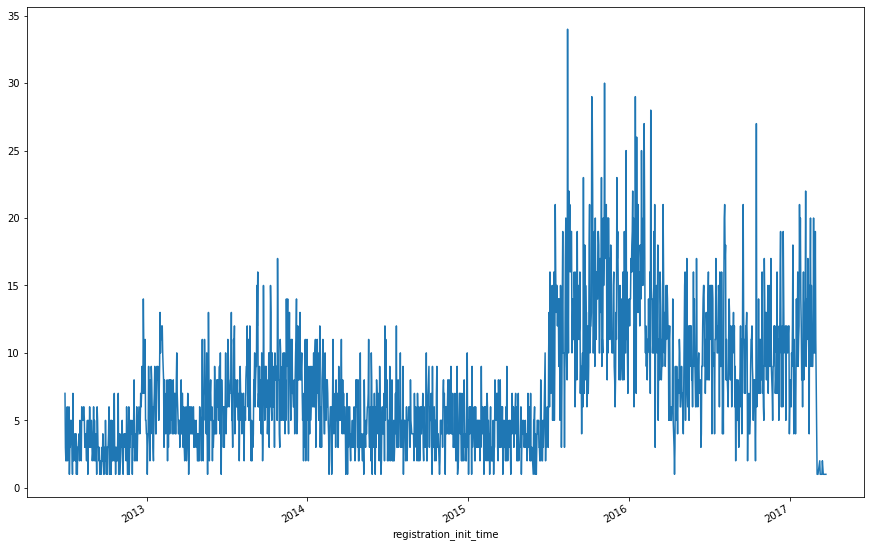

In [16]:
#We can plot a time series of our data to see how it looks - we'll slice from 2013 to make the graph more interpretable
member_churn_df.groupby('registration_init_time').count()[2013:]['is_churn'].plot(figsize = (15,10))

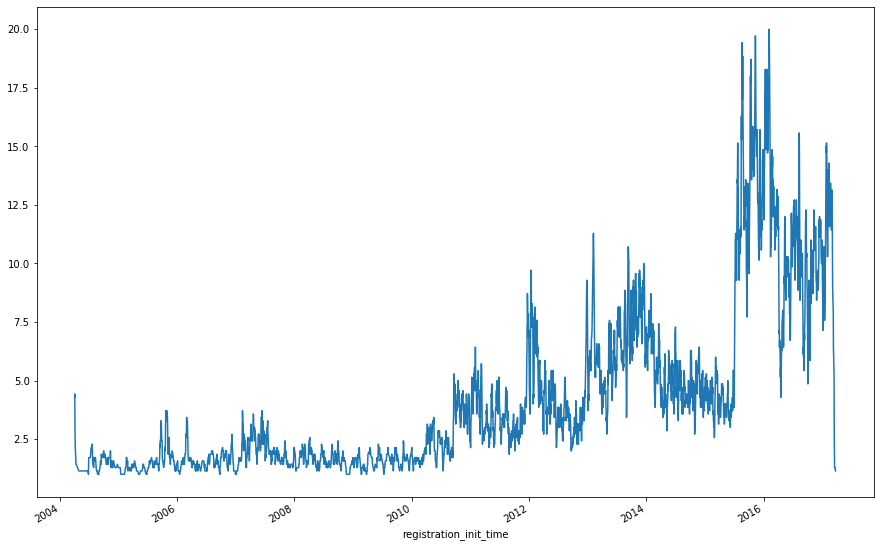

In [17]:
#We can also visualize a "smoother" graph via plotting the moving average with a window of 7
member_churn_df.groupby('registration_init_time').count().rolling(7)['is_churn'].mean().plot(figsize = (15,10))

We can observe that that there appears to be a increase in daily new membership towards the end of 2015. We can try to investigate for possible clues on what caused this increase. One area where we may gain some insight could be registration methods by year and seeing if there was a potential promotion done through one of the methods or the release of a new method. (Say phone app, etc)

In [18]:
#First we can extract the "year" attribute from our date time object.

member_churn_df['year'] = member_churn_df['registration_init_time'].dt.year

#Next we can groupby our year and examine a value count of the registration methods

member_churn_df.groupby('year')['registered_via'].value_counts()

year  registered_via
2004  9                  192
2005  9                  327
2006  9                  357
2007  9                  539
2008  9                  372
2009  9                  312
2010  7                  395
      9                  382
2011  7                  713
      9                  511
      3                   18
2012  7                  768
      3                  471
      9                  292
2013  7                 1413
      3                  697
      9                  298
2014  7                  967
      3                  487
      9                  384
2015  7                 2067
      9                  455
      3                  428
      4                  197
2016  7                 2697
      4                  756
      9                  278
      3                  123
      13                  50
2017  7                  473
      4                  142
      9                   61
      3                   20
      13              

While there did appear to be a new registration method introduced, but we cannot attribute the increase to it alone. Instead from investigation, the method introduced 2010 appeared to have doubled in new membership registration. Researching online, https://www.kkbox.com/about/en/about/timeline, it can be attributed that method 7 is potentially regristration through the Android app.